#### 선형회귀 모델
- 특징이 1개인 경우 어떤 직선을 학습하는 알고리즘
- 특징을 가장 잘 나타낼 수 있는 직선 
- 상관분석을 통해서 양의 상관관계, 음의 상관관계가 있을때만 사용가능

선형 회귀 : 데이터를 가장 잘 반영하는 직선을 찾아라

KNN의 한계
- 가장 가까운 샘플을 찾아 타깃을 평균하는 모델이다. => 여기서 문제가 발생한다.
- 만약 새로운 데이터가 훈련세트의 범위를 벗어나면 엉뚱한 값을 예측한다. 농어가 아무리 커져도 무게가 늘지 않는다.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [ ]:
perch_length = np.array([8.4, 13.7, 15.0, 16.2, 17.4, 18.0, 18.7, 19.0, 19.6, 20.0, 21.0,
       21.0, 21.0, 21.3, 22.0, 22.0, 22.0, 22.0, 22.0, 22.5, 22.5, 22.7,
       23.0, 23.5, 24.0, 24.0, 24.6, 25.0, 25.6, 26.5, 27.3, 27.5, 27.5,
       27.5, 28.0, 28.7, 30.0, 32.8, 34.5, 35.0, 36.5, 36.0, 37.0, 37.0,
       39.0, 39.0, 39.0, 40.0, 40.0, 40.0, 40.0, 42.0, 43.0, 43.0, 43.5,
       44.0])
perch_weight = np.array([5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0, 110.0,
       115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0, 130.0,
       150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0, 197.0,
       218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0, 514.0,
       556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0, 820.0,
       850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0, 1000.0,
       1000.0])

In [ ]:
train_input, test_input, train_target, test_target = train_test_split(perch_length, perch_weight, random_state=42)

In [ ]:
train_input = train_input.reshape(-1, 1)
test_input = test_input.reshape(-1, 1)

In [ ]:
# 선형 회귀 모델 생성
lr = LinearRegression()  #모델 생성

lr.fit(train_input, train_target)

LinearRegression()

In [ ]:
# 길이가 50인 농어를 예측해 보자
print(lr.predict([[50]]))

[1241.83860323]


직선의 방정식 => $y=ax+b$

- y : 농어 무게
- x : 농어 길이
- a : 기울기 => `coef_`
- b : 절편 => `intercept_`

In [ ]:
# 직선의 방정식 => y = ax + b
print(lr.coef_, lr.intercept_)
# 직선의 방정식에서 a의 값과 b의 값을 출력한다.

[39.01714496] -709.0186449535477


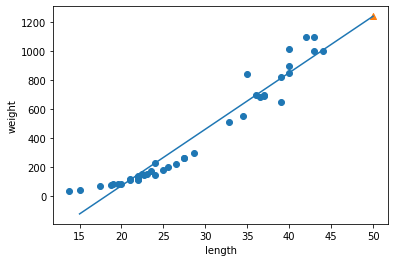

In [ ]:
plt.scatter(train_input, train_target)
# 직선의 방정식을 통해 값을 연산한 것을 y축의 값으로 지정해 준다.
plt.plot([15,50],[15*lr.coef_ + lr.intercept_ , 50*lr.coef_+ lr.intercept_])
plt.scatter(50, 1241.8, marker='^')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

### 복습
#### 데이터 전처리
  - 특징(학습 특징) / 라벨(정답) 데이터셋 생성 -> length,weight, label
  - Train/Test set 분리
  - 정규화

#### 모델 개발
1. 지도학습
  - 분류 - KNN(최근접이웃분류)
  - 회귀(예측) - K-최근접이웃(현실에서는 사용하지 않는다.) 회귀, 선형회귀

  K최근접이웃분류 - 데이터가 많아야 한다.

    ```
      if(K = 3){
        모든 값들의 거리를 비교한다.
        sort
        list <- 3개추출
        3개의 값들의 카테고리를 비교한다.
        가장 많이 속해있는 그룹으로 카테고리를 분류한다.
      }
    ```

  K-최근접이웃회귀 - 이 칭구는 선을 긋는 것이 아니다(선을 긋는 것은 선형회귀이다.)
  문제 : 데이터 셋에 있는 범위만 예측할 수 있다. 즉, 잘못된 값을 도출할 수 있다.
  해결 : 데이터셋의 개수가 엄청 많아야 하는데 이건 쉽지 않지... => 그래서 많이 안써!
  ```
    if(k = 3){
      거리계산을 쫙 다한다.
      거리가 가까운 3개를 뽑는다.
      k = 3으로 뽑힌 값의 무게의 평균을 내어 결과를 도출한다.
    }
  ```

  선형회귀 - 이건 선을 그리는 것
  선은 모든 데이터를 다 맞출 수 없음!
  실제 값과 예측값의 차는 오차를 의미한다. => 이 오차가 가장 적게 나타나는 값을 찾는 것을 선형회귀라고 한다.


  선형 회귀 : 선을 그어서 예측, 이때 선은 실제 값들과 선에서의 예측값의 차인 오차값들을 계산하고 더해서 평균을 내면 전체 오차가 생성된다. 이 오차값이 가장 적게 나오는 선을 찾아서 그으면 된다. 음수값이 나올 수 있다는 단점이 있다.


2. 비지도학습
- 클러스터링(군집화)

->
/+ 딥러닝(CNN, RNN)
